# Artificial Intelligence and Machine Learning Group Project: Trains Dataset

## Project Goal
The main goal of our analysis, and subsequent model implementation, is to understand the customers' satisfaction (whether a customer is satisfied or not), in order to provide the marketing team with several marketing campaign tailored to different customers' needs. 
As a matter of fact, by accurately classifying customers based on their satisfaction, the company can tailor its marketing efforts more effectively. For example:
- **Satisfied customers** can be targeted with loyalty programs or upselling opportunities.
- **Unsatisfied customers** can be approached with remedial measures, discounts, or personalized offers to improve their satisfaction and retain them.

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations. We will know understand the steps of this process:

1. **Understand Column Meanings:** The first focus is on the available data that gives a lot of information. Begin by comprehending the meaning of each column and what each attribute represents and its significance in the analysis. This provides context for your data, which helps to understand and get valuable insights from them. 

2. **Check Data Integrity:** Ensure the integrity of your trains_df by inspecting for missing values (NaNs) and outliers. These are to be removed so that data contains only those values that are relevant and important from the target point of view. This will not only reduce time but also reduces the computational power from an estimation point of view. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions & Pair Plots for Relationships:** Finding a correlation between variables helps to know how a particular variable is related to another. Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.Statistical formulae applied for numerical outputs give fair information, but graphical visuals are more appealing and easier to interpret. Moreover, creating pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

### Step 1: Understand the column meaning
We start by importing the proper libraries and load the trains_trains_trains_df

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler



import os
import requests

In [2]:
# saving the file containing the dataset into a pandas dataframe
initial_trains_df= pd.read_csv("trains.csv", sep=',')

In [3]:
# getting an overview of the raw data
initial_trains_df.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


In [4]:
# identifying the categorical and numerical variables
cat_cols= initial_trains_df.select_dtypes(include=['object']).columns
num_cols = initial_trains_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Date and Time',
       'Work or Leisure'],
      dtype='object')
Numerical Variables:
['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Ticket ID', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating']


## Dataset Features
In the Trains trains_trains_df, each column represents a different feature of the train itself or related to the passengers. Let's get a deeper understanding of each feature: 

• **Satisfied**: whether the customer is satisfied, this is a binary variable, it can be either Yes or No;

• **Onboard General Rating**: rating from 0 to 5 about the service on board, therefore is a numerical variable; 

• **Work or Leisure**: was the travelling for work or leisure, it is a categorical variable and the possible outcomes are 'Work' or 'Leisure';

• **Baggage Handling Rating**: rating from 0 to 5 about the handling of the baggage, therefore is a numerical variable;

• **Age**: the age of the customer, therefore is a numerical variable, that can assume any number according to the age of that person; 

• **Cleanliness Rating**: rating from 0 to 5 about the cleanliness of the train, therefore is a numerical variable; 

• **Ticket Class**: the class of the ticket, divided in 3 categories: Smart, Economic and Premium Class; it's a categorical variable;

• **Loyalty**: if the customer is part of a loyalty programor not, it is a binary variable, it can be Yes or No;

• **Food'n'Drink Rating**: rating from 0 to 5 about the food and bevarages on board, therefore is a numerical variable; 

• **Gender**: whether male or female, it is a categorical variable denoted by M or F;

• **Online Booking Rating**: rating from 0 to 5 about the online booking experience, therefore is a numerical variable; 

• **Ticket ID**: unique ID assigned to the travel ticket, therefore is a numerical variable, it can be any number of 7 figures; 

• **Onboard Service Rating**: rating from 0 to 5 about the service onboard, therefore is a numerical variable; 

• **Legroom Service Rating**: rating from 0 to 5 about the space for the legs, therefore is a numerical variable; 

• **Arrival Delay in Minutes**: the delay on the arrival of the train, therefore is a numerical variable;

• **Departure Delay in Minutes**: the delay on the departure of the train, therefore is a numerical variable, it can assume any number; 

• **Checkin Rating**: rating from 0 to 5 about the checkin experience, therefore is a numerical variable; 

• **Onboard Entertainment Rating**: rating from 0 to 5 about the onboard entertainment experience, therefore is a numerical variable; 

• **Distance**: the distance of the specific travel, therefore is a numerical variable, it can assume any number;  

• **Boarding Rating**: rating from 0 to 5 about the boarding, therefore is a numerical variable; 

• **Onboard WiFi Rating**: rating from 0 to 5 about the WiFi service, therefore is a numerical variable; 

• **Date and Time**: the date and time of the travel, the date is presented as yyyy-mm-dd while the time as hh:mm;

• **Seat Comfort Rating**: rating from 0 to 5 about the comfort of the seating, therefore is a numerical variable; 

• **Track Location Rating**: rating from 0 to 5 about the track where the train has been boarded, therefore is a numerical variable; 

• **Departure Arrival Time Rating**: rating from 0 to 5 about the timing of the travel, therefore is a numerical variable; 

### Step 2: Check Data Integrity
Here we proceed with the EDA by checking the data integrity of the trains_trains_df, with particular attention to missing values. 

In [5]:
# checking for the presence of missing values
display(initial_trains_df.isnull().any())

Legroom Service Rating           False
Onboard General Rating           False
Food'n'Drink Rating              False
Age                              False
Departure Arrival Time Rating    False
Onboard WiFi Rating              False
Ticket ID                        False
Checkin Rating                   False
Track Location Rating            False
Baggage Handling Rating          False
Arrival Delay in Minutes          True
Ticket Class                     False
Loyalty                          False
Gender                           False
Boarding Rating                  False
Online Booking Rating            False
Satisfied                        False
Onboard Entertainment Rating     False
Date and Time                    False
Distance                         False
Seat Comfort Rating              False
Work or Leisure                  False
Departure Delay in Minutes       False
Onboard Service Rating           False
Cleanliness Rating               False
dtype: bool

In [6]:
# Display the count of missing values for each column
missing_values = initial_trains_df.isnull().sum()

print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64


As showned by the code, the only feature containing missing values is the 'Arrrival Delay in Minutes'. Since addressing missing data is crucial for ensuring the accuracy and reliability of insights drawn from a trains_df, understanding the nature of these missing values is essential. 
We decided to address this problem by exploiting the Python library **Missingno**, valuable tool for visualizing and analyzing missing data within our trains_dfs. In particular, we used the **Matrix Plot**, which provides a visual representation of missing values in the trains_df, allowing us to identify patterns and areas with high or low missingness; columns with excessive missing values may need to be removed or imputed.

In [7]:
import missingno as msno

<Axes: >

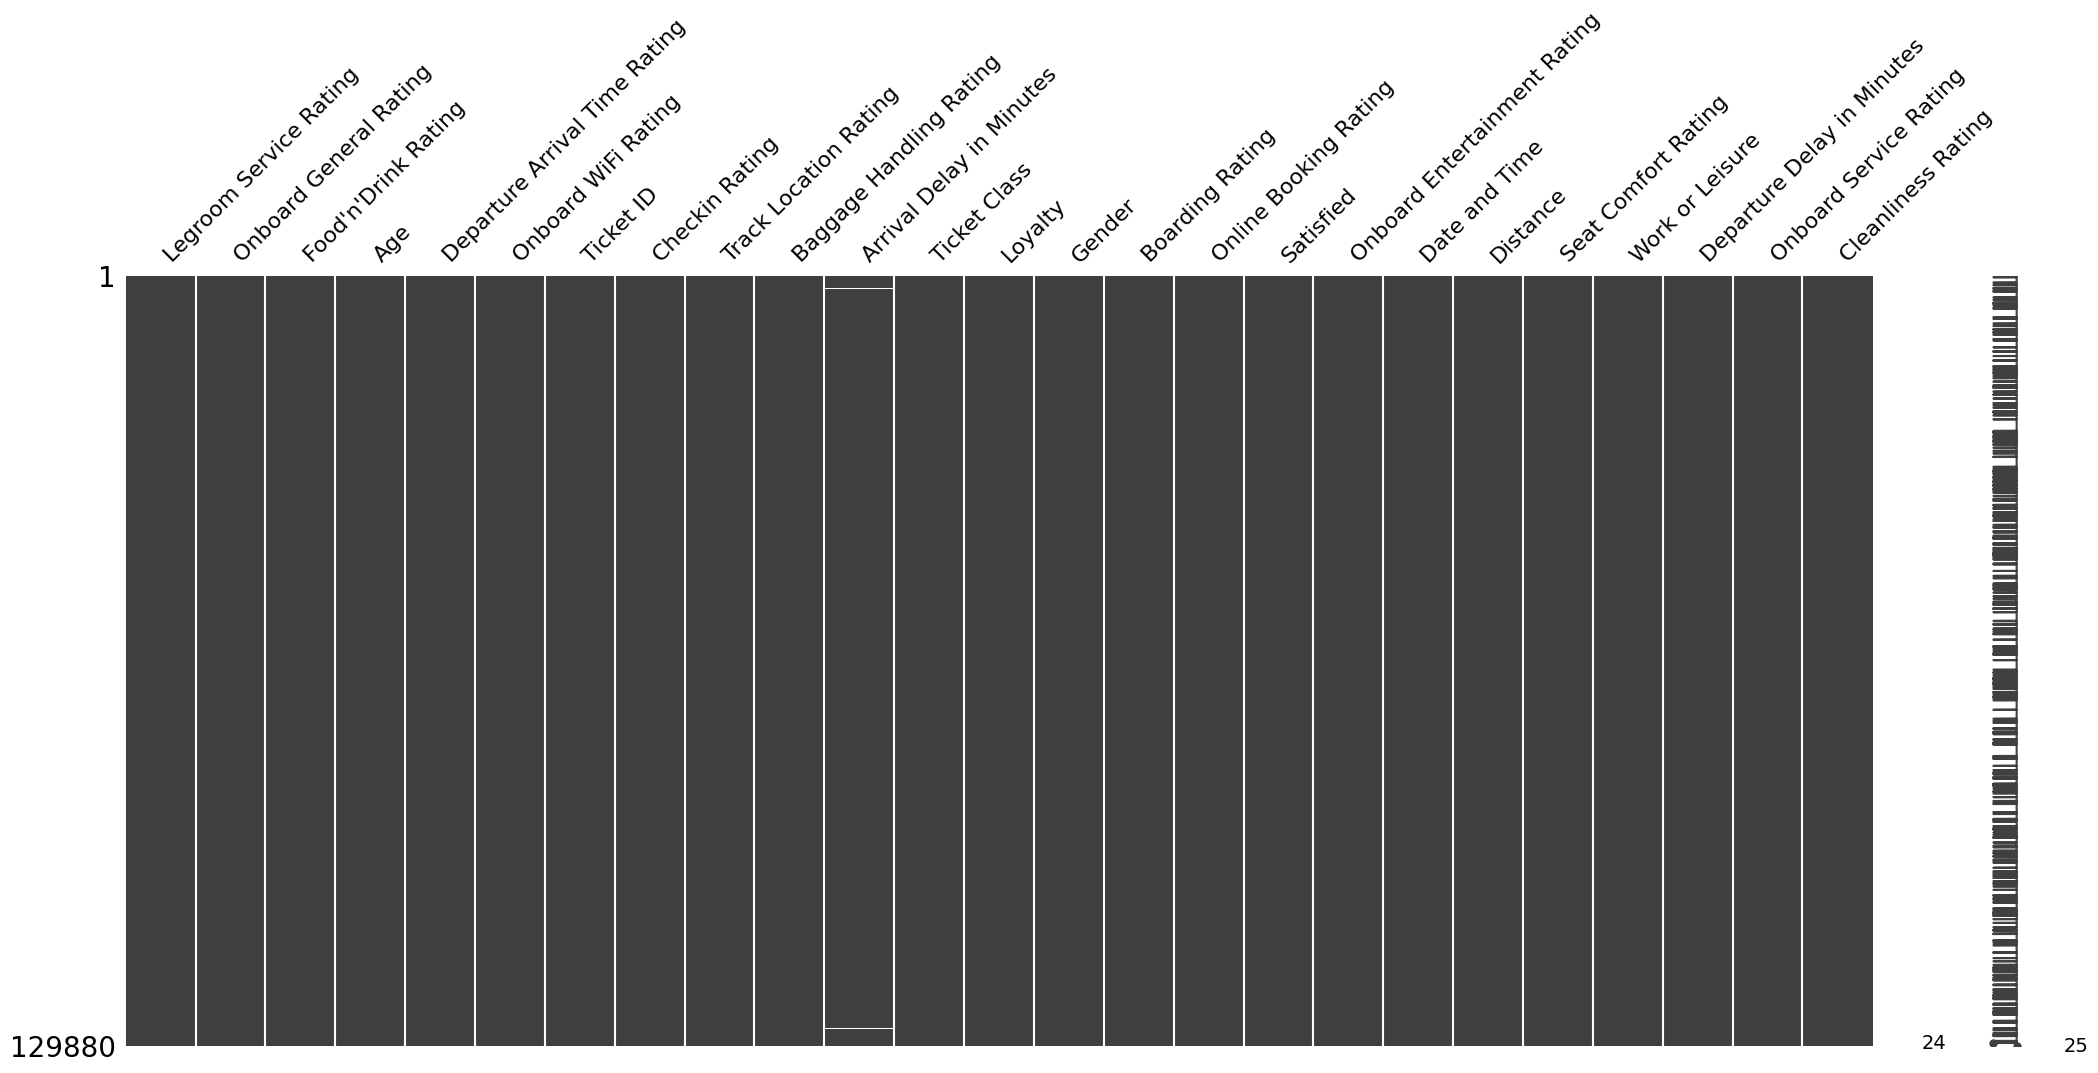

In [8]:
# matrix plot with missingno
msno.matrix(initial_trains_df)

The matrix shows us that the magnitude of the missing values of the 'Arrival Delay in Minutes' is negligible since there are only 396 missing values out of 129880. In order to highlight this consideration we proceed to further compute the percentage of the missing values. 

In [9]:
# Creating a DataFrame for missing values count and percentage
missing_value_df = pd.DataFrame({
    'Missing Values': initial_trains_df.isnull().sum(),
    'Percentage of Total (%)': (initial_trains_df.isnull().sum() / len(initial_trains_df)) * 100
})

# Filter out columns that don't have any missing values 
missing_value_df = missing_value_df[missing_value_df['Missing Values'] > 0]

missing_value_df



,Missing Values,Percentage of Total (%)
Arrival Delay in Minutes,393,0.302587


Again we proved the negligible nature of these missing values; taking into account our previous consideration, we decided to proceed by dropping the rows corresponding to the missing values of 'Arrival Delay in Minutes', due to the marginal importance of the missing values considering the whole trains_df.

In [10]:
#Drop rows with missing 'Arrival Delay in Minutes' values
trains_df = initial_trains_df.dropna(subset=['Arrival Delay in Minutes'])

# Calculate the number of rows dropped
rows_dropped = len(initial_trains_df) - len(trains_df)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")


# Check if there are any NaN values in the dataset
if trains_df.isnull().any().any():
    print("The dataset contains NaN values")
else:
    print("The dataset does not contain any NaN values")

# Get the count of NaN values in each column
nan_counts = trains_df.isnull().sum()

# Print the counts
print(nan_counts)

Number of Rows Dropped: 393
The dataset does not contain any NaN values
Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64


Finally we obtain a clean dataset, with no missing values.

### Cleaning the Data
For our analysis, we decided to drop the following two columns, 'Ticket ID' and 'Date and Time', since we do not consider them relevant for our analysis; as a matter of fact the 'Ticket ID' is a unique ID assigned to the travel ticket not providing any additional information about our customers, while the 'Date and Time' is a variable containing the date and time of the travel that again doesn't provide any information about the satisfaction rate (different from the Departure Arrival Time Rating which instead rates the punctuality of the services provided by the company).

In [11]:
# drop Ticket ID column
trains_df = trains_df.drop(['Ticket ID'], axis=1)
# drop Date and Time column
trains_df = trains_df.drop(['Date and Time'], axis=1)

# get the shape of trains_df
print(trains_df.shape)

(129487, 23)


In [13]:
#recalculate the categorical variables without the dropped columns
cat_cols= trains_df.select_dtypes(include=['object']).columns
num_cols = trains_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Work or Leisure'], dtype='object')
Numerical Variables:
['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating']


In [14]:
# here we print an indepth description of the numerical variables in our dataset: the number of instances in each variable, the mean,
# standard deviation, minimum and maximum values, and the 25th, 50th and 75th percentiles
trains_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Legroom Service Rating,129487.0,3.351078,1.316132,0.0,2.0,4.0,4.0,5.0
Onboard General Rating,129487.0,3.642373,1.176614,0.0,3.0,4.0,5.0,5.0
Food'n'Drink Rating,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Departure Arrival Time Rating,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Onboard WiFi Rating,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Checkin Rating,129487.0,3.306239,1.266146,0.0,3.0,3.0,4.0,5.0
Track Location Rating,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Baggage Handling Rating,129487.0,3.631886,1.180082,1.0,3.0,4.0,5.0,5.0
Arrival Delay in Minutes,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0


## Step 3: Visualize distributions

## Pairplots for Relationships
Pairplots, also known as pairwise scatter plots or scatterplot matrices, are important in Exploratory Data Analysis (EDA) for several reasons:

1. **Visualization of Relationships**: Pairplots allow you to visualize the relationships between pairs of variables in your trains_df. By plotting each pair of variables against each other, you can quickly identify patterns, trends, and potential correlations. This visual inspection can reveal both linear and non-linear relationships between variables.

2. **Identifying Outliers**: Pairplots can help in identifying outliers or anomalies in the data. Outliers may appear as data points that fall far from the main cluster of points in the scatterplots. Identifying outliers is crucial because they can significantly impact statistical analyses and machine learning models.

3. **Multivariate Analysis**: EDA often involves examining the interactions between multiple variables simultaneously. Pairplots provide a comprehensive view of these interactions, making it easier to assess how different variables relate to one another in a multivariate context.

4. **Feature Selection**: When dealing with a large number of features (variables), pairplots can aid in feature selection. You can use them to visually identify which pairs of variables show strong relationships or dependencies, which may guide you in selecting a subset of the most relevant features for further analysis or modeling.

5. **Diagnosing Collinearity**: Collinearity is a situation where two or more variables in your trains_df are highly correlated with each other. Pairplots can help you diagnose collinearity by showing if there are strong linear relationships between pairs of variables. Identifying collinearity is important because it can lead to instability in regression models and make it challenging to interpret the importance of individual predictors.

6. **Data Quality Assessment**: Pairplots can reveal data quality issues such as missing values or data entry errors. If you see unusual patterns or gaps in the scatterplots, it may indicate problems with the data that need to be addressed.

7. **Hypothesis Generation**: Pairplots can serve as a starting point for generating hypotheses about your data. When you observe interesting patterns or relationships in the pairplots, you can formulate hypotheses to be tested in subsequent analyses.

8. **Communication**: Pairplots are a useful tool for communicating insights about your data to others, including team members, stakeholders, or non-technical audiences. Visualizations often make it easier for people to grasp complex relationships in the data.

Due to the 'relevant' size and dimension of our trains_df datset we decided to not exploit all methods provided during the course in order to avoid long waiting-times, but to restrict our analysis to the following viualization and distribution methods: 
- the **heatmap**, in order to understand the correlation between the different features of our trains_df;
- the **countplots**, to identify dominant categories and detecting any imbalances or variations in the data.

**HEATMAP**

**Definition:**
A heatmap is a graphical representation of data where the correlation between values is depicted with colors. The variables are diaplayes alongside the axis, just like in a *n x n* matrix, while each cell reports a numeric count which the count is accompanied by a color, with larger counts associated with 'darker' colorings.

**Usage:**
Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables. For our analysis we started by plotting the heatmap of the correlation matrix between the numerical features; since heatmaps are extremely versatile and efficient in drawing attention to trends, exploiting their ability to rapidly communicate key data insights to the viewer is why this tool has been particularly useful in our project.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

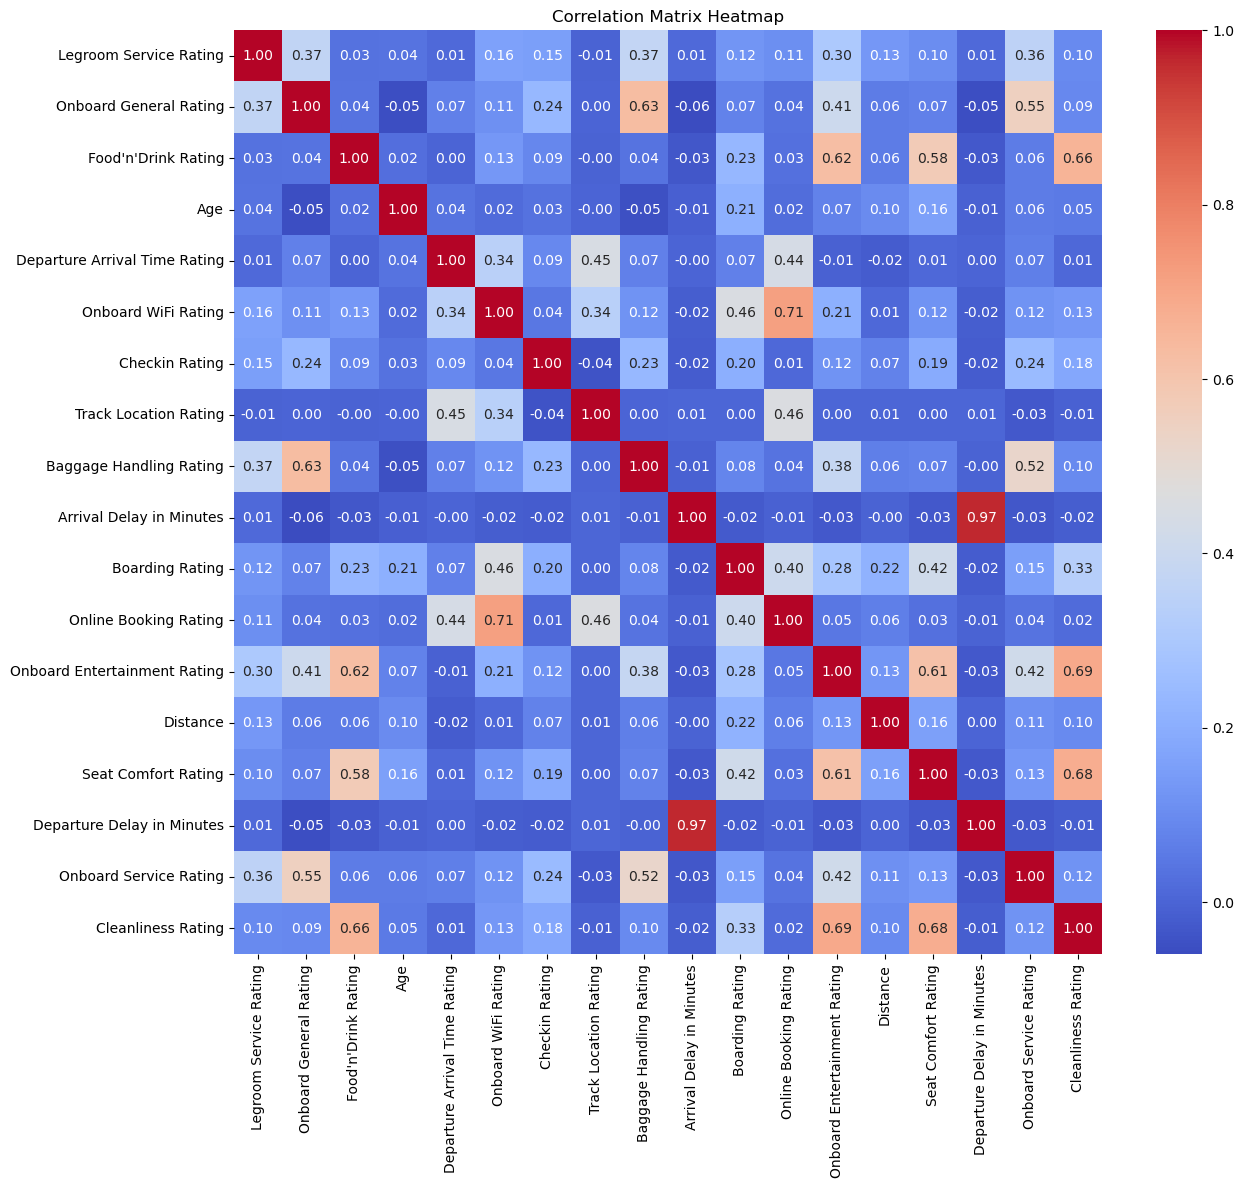

In [113]:
# Plotting the correlation matrix between numerical variables as a heatmap
num_cols = trains_df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = trains_df[num_cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")

Cells containing positive values indicate a positive correlation between two features, while a negative value indicates a negative correlation. The closer the value is to 0, the weaker the correlation between the two features, while the closer the value is to 1 (or -1), the stronger the positive (or negative) correlation between the two features. In this correlation matrix we can observe that the highest correlation (excluding the values along the diagonal and the correlation between 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' which is quite straightforward) was achieved by 'Online Booking Rating' and 'Onboard Wifi Rating' which can be explained by the fact that both features are related to the online experience of the customer. Other relevant high correlation scores were achieved between 'Cleanliness Rating' and 'Onboard Entertainment Rating', between 'Seat Rating' and 'Cleanliness Rating', and lastly between 'Cleanliness Rating' and 'Onboard Entertainment Rating', which show how customers positively valued a clean environment and its comforts.

*Be aware* that the correlation matrix displayed is taking into account only the numerical variables (since we still haven't proceeded with the encoding of the categorical variables), hence our target variable 'Satisfied' is not included in the heatmap.

**COUNTPLOTS**
 
Countplots in Seaborn are used to visualize the frequency of categorical and numerical data; using seaborn.countplot() we get to display the counts of observations in each categorical bin using bars. Especially useful in exploring and comparing data, countplots assist in identifying dominant categories, detecting any imbalances or variations in the data, grasping the distribution and relative frequencies of various categories through the visualization of each category’s counts as vertical bars or columns.

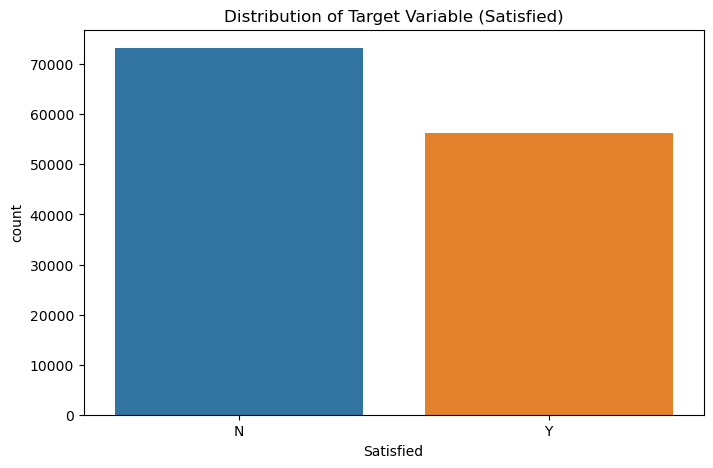

In [114]:
# analyzing the distribution of the target categorical variable 'Satisfied'
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfied', data=trains_df)
plt.title('Distribution of Target Variable (Satisfied)')
plt.show()

In [17]:
# Calculating the distribution of the 'Satisfied' class
class_distribution = trains_df['Satisfied'].value_counts(normalize=True) * 100

# Convert the Series to a DataFrame and print it
class_distribution_df = class_distribution.to_frame().reset_index()
class_distribution_df.columns = ['Satisfied', 'Percentage']

# print the dataframe
print(class_distribution_df)

  Satisfied  Percentage
0         N   56.550078
1         Y   43.449922


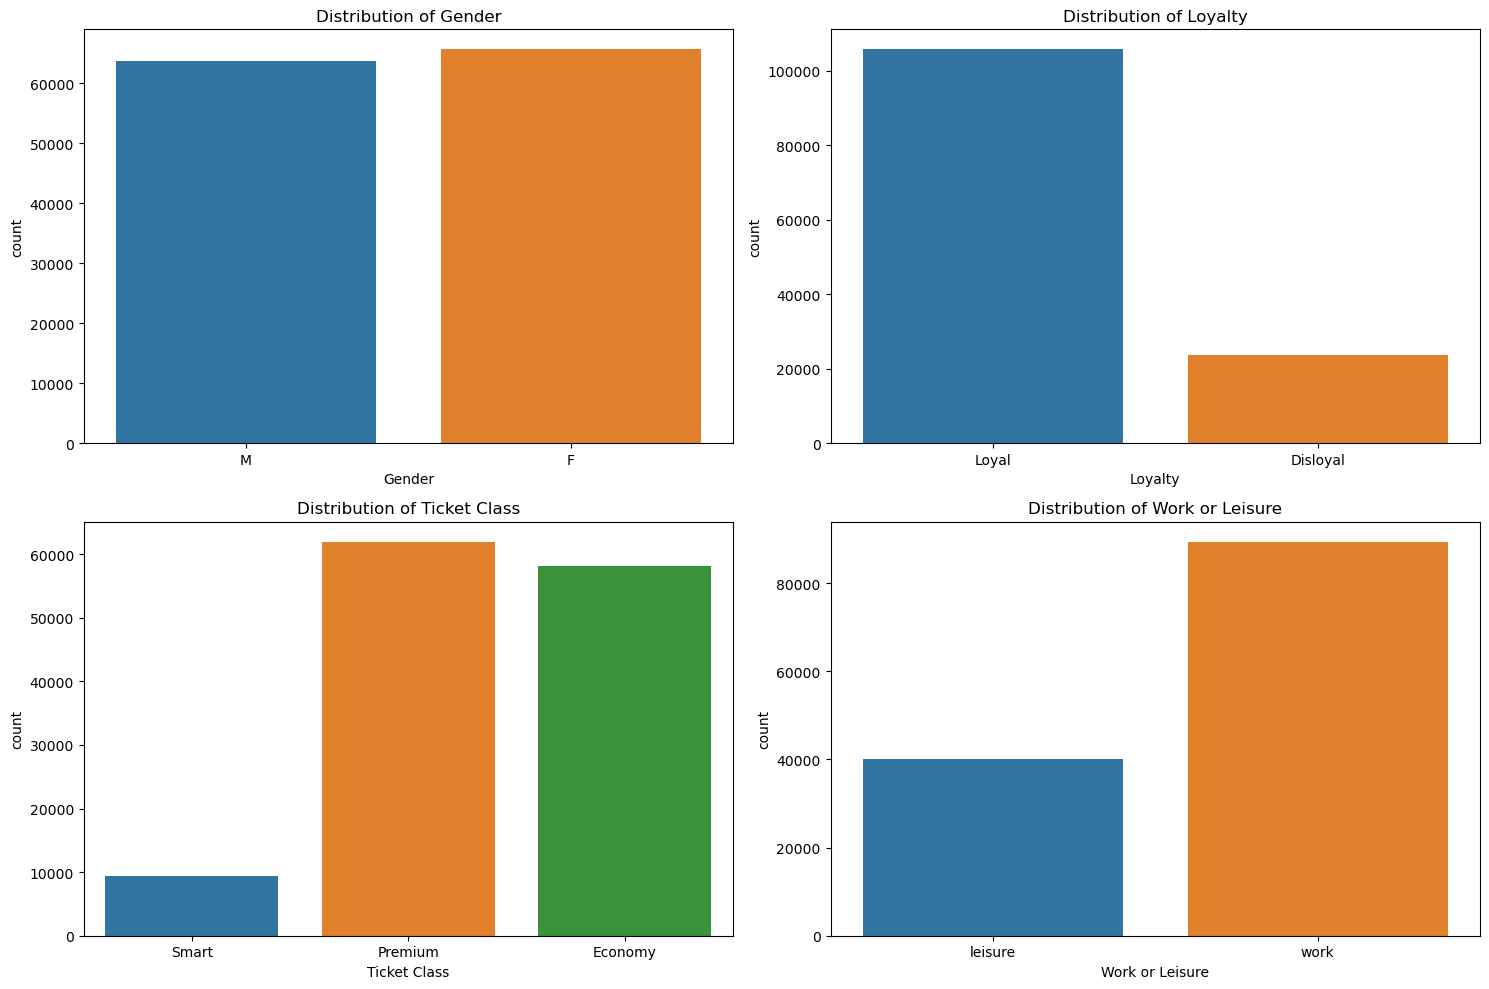

In [115]:
# let's select the other categorical variables to be visualized
categorical_features = ['Gender', 'Loyalty', 'Ticket Class', 'Work or Leisure']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, cat in enumerate(categorical_features):
    row, col = i // 2, i % 2
    sns.countplot(x=cat, data=trains_df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {cat}')
plt.tight_layout()
plt.show()

By plotting the above histograms, we get a better understanding of the distribution of our categorical variables:

• **Satisfied**: for our target variable we can immediately see that the number of satisfied customers is lower than the number of unsatisfied customers, which could already be an indicator of a general trend in the data that might lead to a slightly unbalanced dataset;

• **Gender**: the presence of male and female customers was almost perfectly balanced in our dataset; 

• **Distribution of Loyalty**: customers that had already joined the company's loyalty program were more likely to use again the services provided by the company rather than customers that were not part of the loyalty program; this shows how the data collected for this analysis mainly came from regular customers who might have experienced the company' services more than once, making their ratings more reliable; 

• **Distribution of Ticket Class**: the purchase levels of Premium and Economy tickets registered almost the same values for both, while Smart Class tickets were only purchased by a small fraction of the total customers; therefore, the company might be facing two different types of customers: the ones that are willing to spend more for a better service (Premium Class) and the ones that are more price-sensitive and are willing to sacrifice some comfort for a cheaper ticket(Economy Class), without having an 'in-between' category of customers that are willing to spend a little more for a better service than the Economy Class but not as much as the Premium Class (Smart Class);

• **Distribution of Work or Leisure**: the majority of the customers were travelling for work rather than for leisure; this could be explained by the fact that the company mainly operates in the business sector, providing services for business travellers rather than for leisure travellers;


c:\Users\UTENTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\UTENTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\UTENTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\UTENTE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

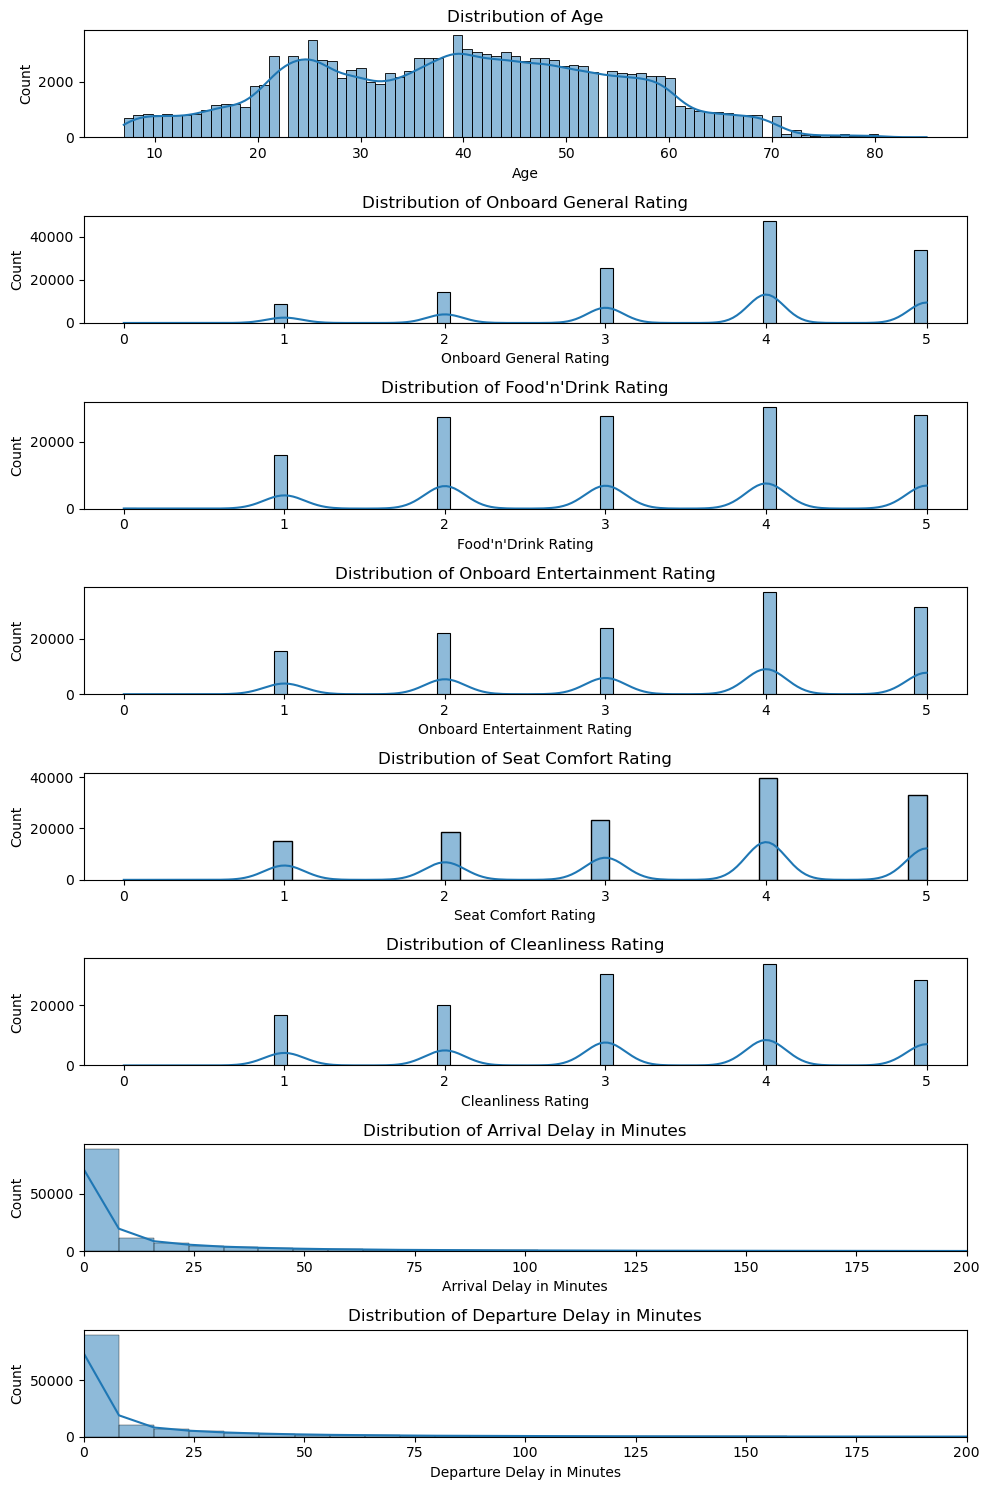

In [116]:
# now we will analyze the distribution of the numerical variables
numerical_features = ['Age','Onboard General Rating',"Food'n'Drink Rating",'Onboard Entertainment Rating','Seat Comfort Rating','Cleanliness Rating', 'Arrival Delay in Minutes','Departure Delay in Minutes']
# create a figure with subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 15))

# plot distribution plots for each numerical feature
for i, col in enumerate(numerical_features):
    if col == 'Arrival Delay in Minutes' or col == 'Departure Delay in Minutes':
        sns.histplot(data=trains_df, x=col, bins=200, kde=True, ax=axes[i])
        axes[i].set_xlim(0, 200)
        axes[i].set_title(f'Distribution of {col}')
    else:
        sns.histplot(data=trains_df, x=col, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Here we proceed with further considerations about the distribution of the numerical variables:

• **Ratings**: the ratings of the different services provided by the company were mainly positive, with the majority of the customers giving a rating of 4 out of 5; this could be an indicator of a good service provided by the company, but it could also be a sign of a biased dataset, since customers that were not satisfied with the service provided by the company might have decided to not give any rating at all;

• **Distribution of Age**: the age distribution of the customers was quite balanced between 20 and 60 years-old people with a slight skewness towards the younger and older customers; this could be explained by the fact that the company might mainly operate in the business sector (as showned by the majority of customers travveling for work purposes), providing services for business travellers rather than for leisure travellers, which are usually aged between 20 and 60 years old;

• **Distribution of Departure and Arrival Delay in minutes**: the distribution of the departure and arrival delay in minutes was quite similar since these two features are highly correlated, with the majority of the customers experiencing a delay of less than 10 minutes; this could be an indicator of a good service provided by the company, but it could also be a sign of a biased dataset, since again customers that experienced a delay of more than 10 minutes might have decided to not give any rating at all. 

## Correlation Analysis with our *TARGET VARIABLE*

Let's understand the **role** of our **target variable** 'Satisfied':
- how it **affect** the other variables 
- what are the **relationships** with the other variables.

Before plotting the correlation matrix, we need to map the binary categorical variable 'Satisfied' into a numerical range of [0,1]

In [18]:
# Step 1: Verifing the binary nature of the target variable
print("Unique values before mapping:", trains_df['Satisfied'].unique())


Unique values before mapping: ['N' 'Y']


In [19]:
# Step 2: Apply the mapping; 1 for 'Y' and 0 for 'N'
trains_df['Satisfied'] = trains_df['Satisfied'].map({'Y': 1, 'N': 0})

In [21]:
# Step 3: Inspect the result
print("\nUnique values after mapping:", trains_df['Satisfied'].unique())
print("\nFirst few rows after mapping:")
print(trains_df['Satisfied'].head())


Unique values after mapping: [0 1]

First few rows after mapping:
0    0
1    0
2    1
3    0
4    1
Name: Satisfied, dtype: int64


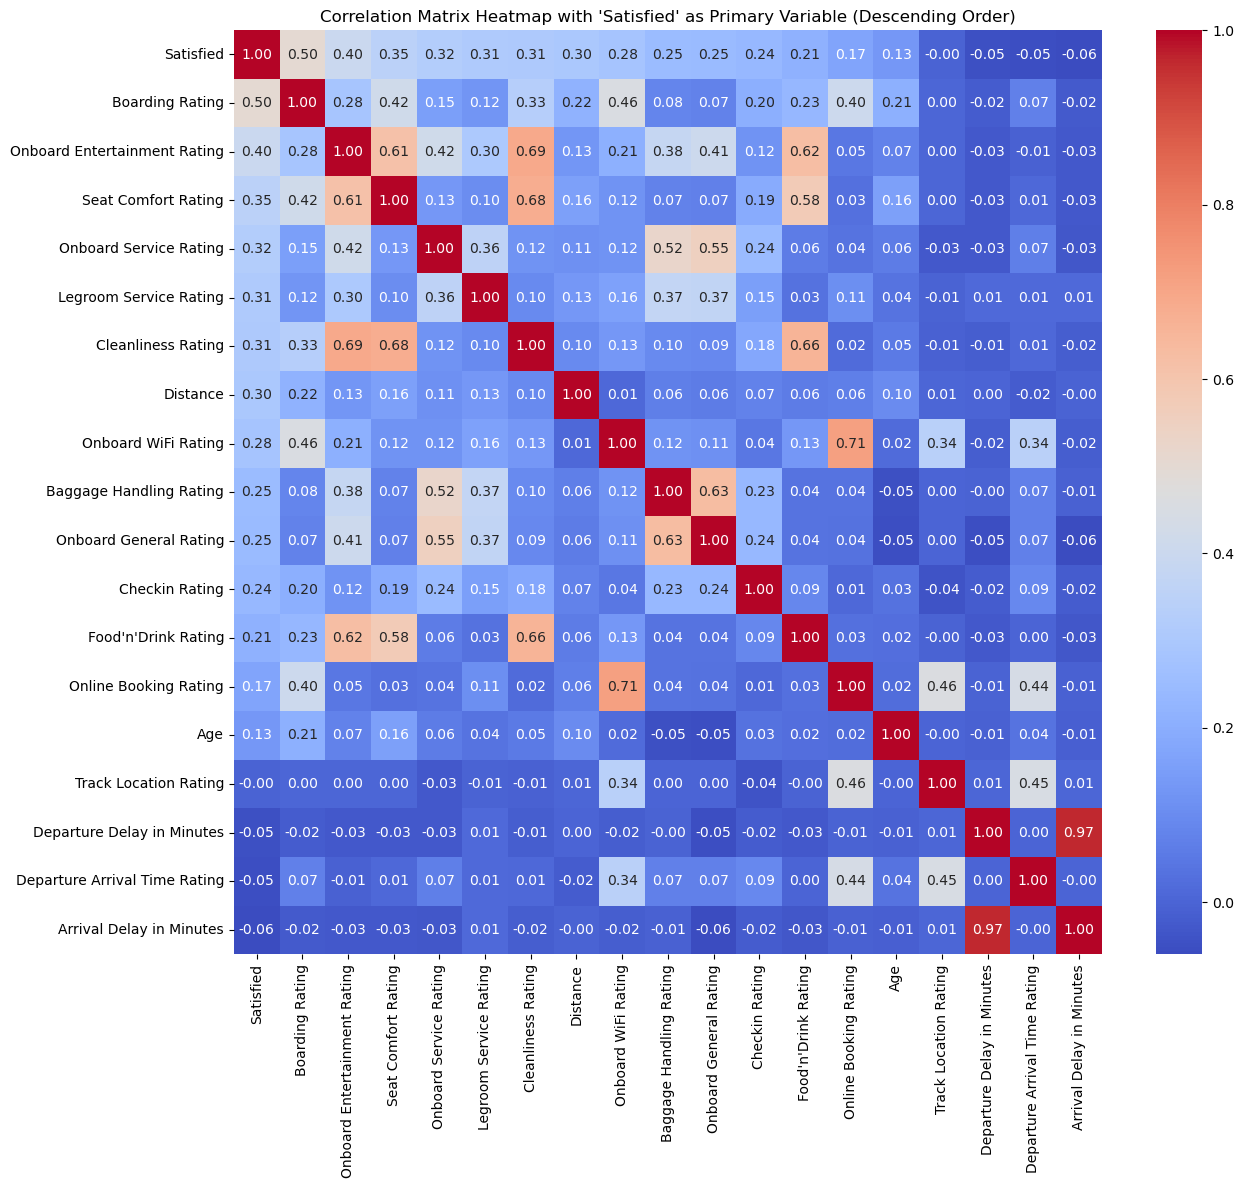

In [121]:
# Including 'Satisfied' in the list to calculate its correlation with other numerical variables
num_cols_with_target = num_cols + ['Satisfied']

# Calculate the correlation matrix
corr_matrix = trains_df[num_cols_with_target].corr()

# Extract the 'Satisfied' column (excluding the 'Satisfied' row) and sort in descending order
satisfied_corr = corr_matrix['Satisfied'].drop('Satisfied').sort_values(ascending=False)

# Get the sorted indices, placing 'Satisfied' first
sorted_indices = ['Satisfied'] + list(satisfied_corr.index)

# Reorder the correlation matrix
corr_matrix_sorted = corr_matrix.loc[sorted_indices, sorted_indices]

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_sorted, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap with 'Satisfied' as Primary Variable (Descending Order)")
plt.show()



Now, we can finally visualize the correlation of the target variable with the other numerical features of our trains_df datset; before proceeding with further considerations, we decided to restrict our analysis to the numerical features displaying a correlation with the 'Satisfied' variable higher than 0.24 (not included) in order to focus on the top ten most correlated variables. 

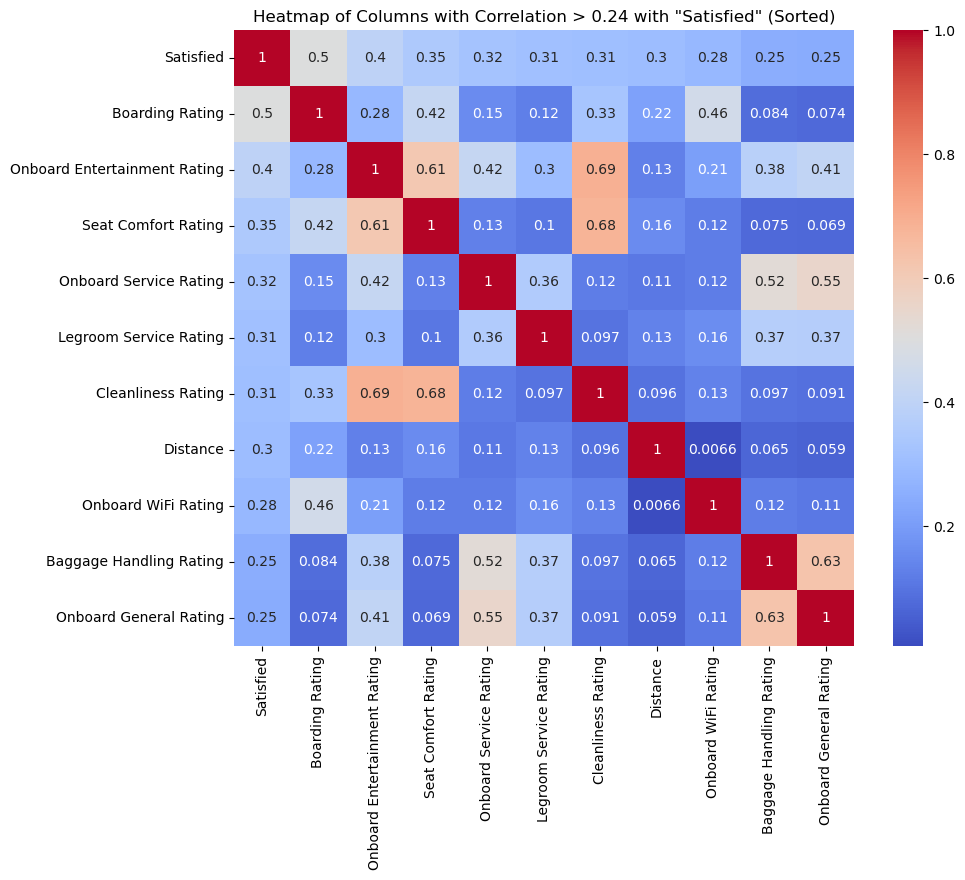

In [122]:
# Find columns where the absolute correlation with 'Satisfied' is greater than 0.24
cols_with_high_corr = corr_matrix.index[abs(corr_matrix['Satisfied']) > 0.24].tolist()

# Filter the correlation matrix to include only these columns
filtered_corr_matrix = corr_matrix.loc[cols_with_high_corr, cols_with_high_corr]

# Sort the filtered columns (excluding 'Satisfied') based on their correlation with 'Satisfied' in descending order
satisfied_corr_filtered = filtered_corr_matrix['Satisfied'].drop('Satisfied').sort_values(ascending=False)

# Get the sorted indices, placing 'Satisfied' first
sorted_indices_filtered = ['Satisfied'] + list(satisfied_corr_filtered.index)

# Reorder the filtered correlation matrix
filtered_corr_matrix_sorted = filtered_corr_matrix.loc[sorted_indices_filtered, sorted_indices_filtered]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix_sorted, annot=True, cmap='coolwarm')
plt.title('Heatmap of Columns with Correlation > 0.24 with "Satisfied" (Sorted)')
plt.show()


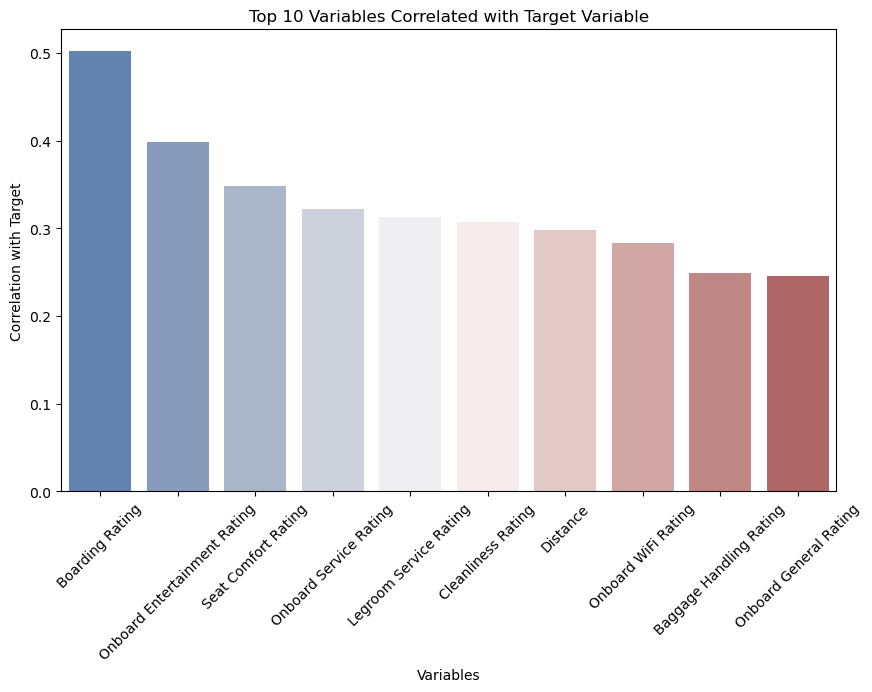

In [123]:
# Filter the DataFrame to include only the columns with correlation higher than 0.24
filtered_trains_df = trains_df[cols_with_high_corr]
target = 'Satisfied'

# Calculate the correlation and sort by absolute value in descending order
corr_values = filtered_trains_df.corr()[target].drop(target).abs().sort_values(ascending=False)

# Select the top 10 variables
top_10_corr_values = corr_values.head(10)

# Step 2: Create a Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_corr_values.index, y=top_10_corr_values.values, palette="vlag")
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Variables Correlated with Target Variable')
plt.show()



The highest correlation with our target variable 'Satisfied' was achieved by the 'Boarding Rating' variable; this could be explained by the fact that the boarding experience is the first contact that the customer has with the company's services, and therefore it is crucial for the customer's satisfaction. However, none of the numerical features achieved a correlation higher than 0.50 with our target variable, which could be an indicator of a subtle correlation between the numerical features and the target variable, and therefore of a frail predictive power of the numerical features on the target variable. The lowest correlation score between the top ten features was achieved by the 'Baggage Handling Rating' variable, which could be explained by the fact that the baggage handling experience is not a crucial factor for the customer's satisfaction, and, what it is quite surprising, by the 'Onboard General Rating' variable; however, the onboard experience is usually related to the comfort of the seating, the onboard entertainment, the food and beverages and many others, which are all rated separately by the customers, and therefore the 'Onboard General Rating' might be the reflection of a 'qualitative' mean between these variables. Moreover, what it's even more surprising is that the correlation between the 'Satisfied' variable and both the 'Departure Delay' and 'Arrival Delay' variables achieved a correlation almost equal to zero; therefore, it appears that the delay of the train was not a crucial factor, as it could have been expected to be, in determining the customer's satisfaction.

# PREPROCESSING

Preprocessing is the **process of preparing raw data**, an **essential step** in any machine learning project, as it can **help to improve** the **performance and accuracy** of the model.  

The **goal** of preprocessing is to **transform the raw data** into a **format that is more suitable** for machine learning algorithms. This may involve:
- cleaning the data; 
- handling missing values (as we already did in the EDA section by handling them with Missingno); 
- encoding categorical features (which is exactly what we will do in this section);
- scaling numerical features (we will handle this aspect after the splitting of the dataset).

The **majority of the real-world datasets** for machine learning are **highly susceptible to be missing, inconsistent, and noisy** due to their heterogeneous origin and this would **not give quality results** as it would fail to identify patterns effectively. 
- **Duplicate or missing values** may give an **incorrect view** of the **overall statistics** of data.
- **Outliers and inconsistent data points** often tend to **disturb the model’s overall learning**, leading to **false predictions**.



### Encoding of categorical variables
we used **one-hot encoding** since:
- the categorical feature is nominal (e.g., cwork or leisure etc.);
- the model we are using does not assume any order or hierarchy in the feature (like most tree-based models).

In [124]:
#let's redifine the categorical values without satisfied
cat_cols= trains_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Ticket Class', 'Loyalty', 'Gender', 'Work or Leisure'], dtype='object')

In [125]:
encoded_trains_df = pd.get_dummies(trains_df, columns=cat_cols)

# Display the result
encoded_trains_df.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,...,Cleanliness Rating,Ticket Class_Economy,Ticket Class_Premium,Ticket Class_Smart,Loyalty_Disloyal,Loyalty_Loyal,Gender_F,Gender_M,Work or Leisure_leisure,Work or Leisure_work
0,3,5,5,13,4,3,4,1,4,18.0,...,5,False,False,True,False,True,False,True,True,False
1,5,4,1,25,2,3,1,3,3,6.0,...,1,False,True,False,True,False,False,True,False,True
2,3,4,5,26,2,2,4,2,4,0.0,...,5,False,True,False,False,True,True,False,False,True
3,5,4,2,25,5,2,1,5,3,9.0,...,2,False,True,False,False,True,True,False,False,True
4,4,3,4,61,3,3,3,3,4,0.0,...,3,False,True,False,False,True,False,True,False,True


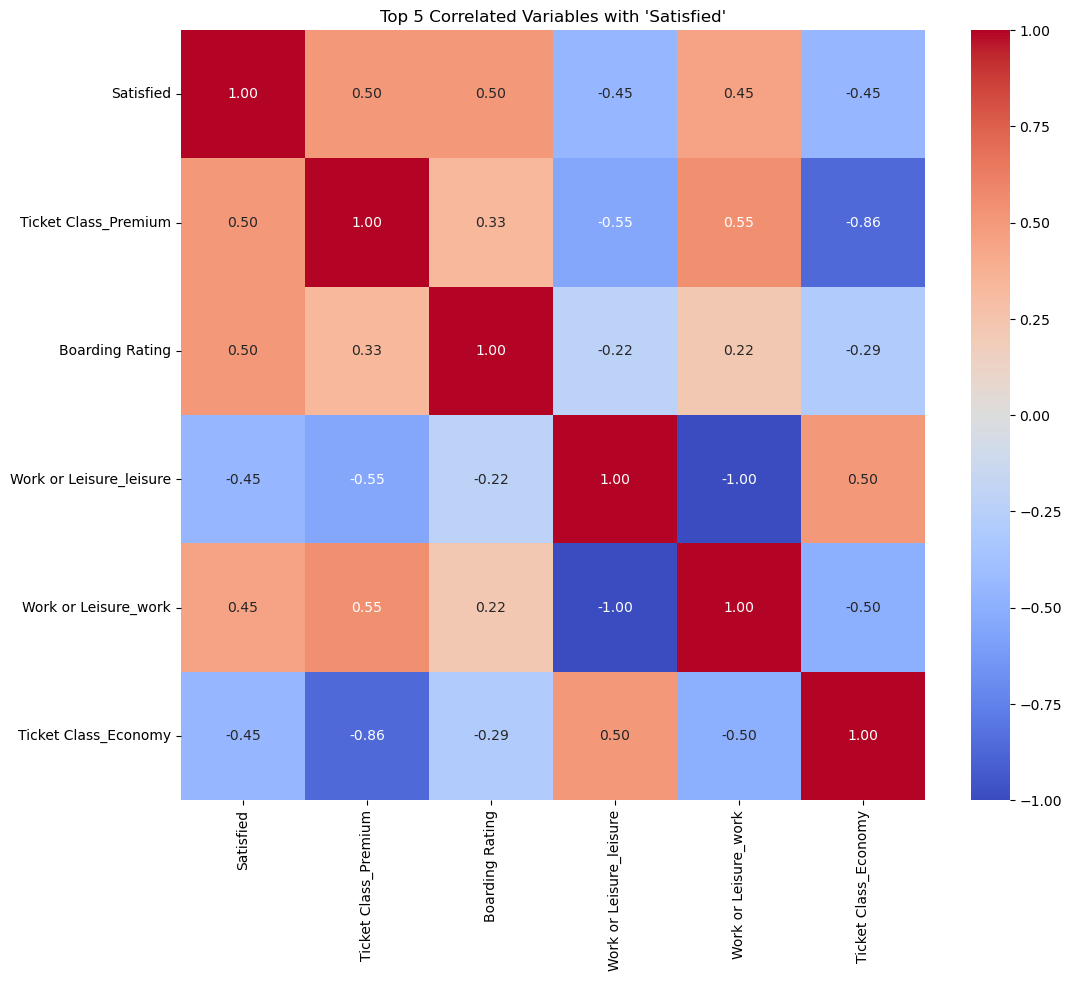

In [126]:
# Calculate the correlation matrix
corr_matrix = encoded_trains_df.corr()

# Extract the 'Satisfied' column (excluding the 'Satisfied' row) and sort by absolute value in descending order
satisfied_corr = corr_matrix['Satisfied'].drop('Satisfied').abs().sort_values(ascending=False)

# Select the top 10 most correlated variables
top_correlated_cols = satisfied_corr.head(5).index.tolist()

# Include 'Satisfied' in the list to see its correlation with these variables
selected_columns = ['Satisfied'] + top_correlated_cols

# Reorder the correlation matrix to include only these selected columns
corr_matrix_selected = corr_matrix.loc[selected_columns, selected_columns]

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix_selected, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Top 5 Correlated Variables with 'Satisfied'")
plt.show()

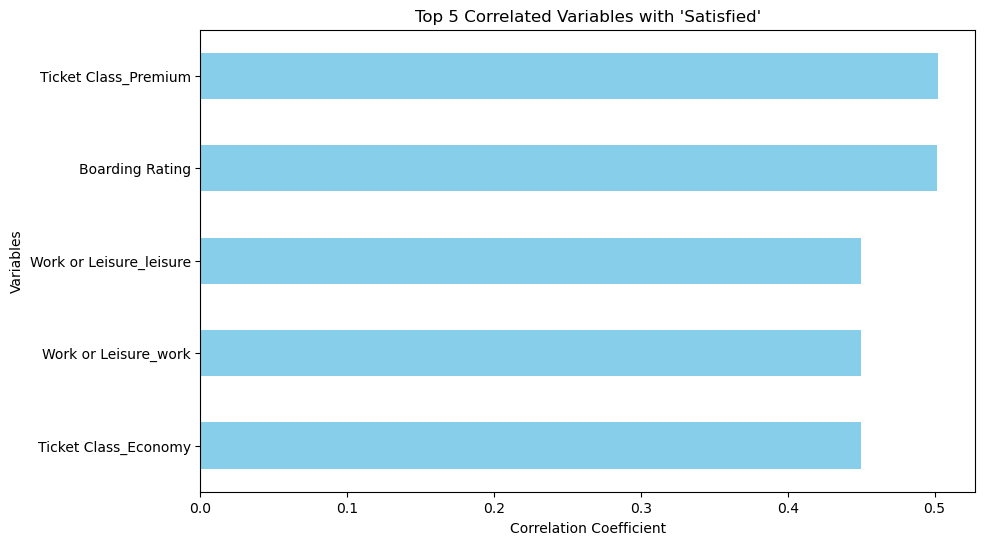

In [127]:
# Extract the 'Satisfied' column (excluding the 'Satisfied' row) and sort by absolute value in descending order
satisfied_corr = corr_matrix['Satisfied'].drop('Satisfied').abs().sort_values(ascending=False)

# Select the top 5 most correlated variables
top_correlated_cols = satisfied_corr.head(5)

# Create an ascending barplot
plt.figure(figsize=(10, 6))  # Adjust the size as needed
top_correlated_cols.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 5 Correlated Variables with 'Satisfied'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variables")
plt.show()

## **Splitting the dataset into train and test set**

In [128]:
from sklearn.model_selection import train_test_split


# Define features (X) and target (y)
X = encoded_trains_df.drop('Satisfied', axis=1)
y = encoded_trains_df['Satisfied']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting sets
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Shapes of the split datasets:
X_train shape: (97115, 27), y_train shape: (97115,)
X_test shape: (32372, 27), y_test shape: (32372,)


In [129]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")


Distribution of y (Original Dataset):
Class 0: 73225 samples
Class 1: 56262 samples
Ratio: 0.43449921613752734

Distribution of y_train (Training Set):
Class 0: 54854 samples
Class 1: 42261 samples
Ratio: 0.4351644957009731

Distribution of y_test (Test Set):
Class 0: 18371 samples
Class 1: 14001 samples
Ratio: 0.4325033979982701


In [130]:
from sklearn.model_selection import train_test_split


# Define features (X) and target (y)
X = encoded_trains_df.drop('Satisfied', axis=1)
y = encoded_trains_df['Satisfied']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Shapes of the split datasets:
X_train shape: (97115, 27), y_train shape: (97115,)
X_test shape: (32372, 27), y_test shape: (32372,)


In [131]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")

Distribution of y (Original Dataset):
Class 0: 73225 samples
Class 1: 56262 samples
Ratio: 0.43449921613752734

Distribution of y_train (Training Set):
Class 0: 54919 samples
Class 1: 42196 samples
Ratio: 0.434495186119549

Distribution of y_test (Test Set):
Class 0: 18306 samples
Class 1: 14066 samples
Ratio: 0.43451130606697147


### Important Notes
- Fit the Scaler on Training Data Only: It's crucial to fit the scaler only on the training data and not the testing data to avoid data leakage.
- Transform Both Training and Testing Data: After fitting the scaler on the training data, you transform both the training and testing sets.
- Handle Non-Numerical Data: If your dataset includes non-numerical data, ensure that you only scale the numerical columns.

In [132]:
# Standardize the data
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [133]:
#show the shape and composition of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (97115, 27)
X_test shape: (32372, 27)
y_train shape: (97115,)
y_test shape: (32372,)


## **MODEL TRAINING**


*How it works?* We feed a **large amount of data** to the model and it **tries to figure out the features** on its own to **make future predictions**.



### *Model evaluation*
*How does it work?* Model evaluation is the **process that uses some metrics** which help us to **analyze the performance** of the model. 

Therefore evaluating a model **plays a vital role** so that we can **judge the performance of our model**. The evaluation also **helps to analyze a model’s key weaknesses**. There are **many metrics** like Accuracy, Precision, Recall, F1 score, Area under Curve, Confusion Matrix, and Mean Square Error. 
- *Accuracy*: is defined as the **ratio of the number of correct predictions to the total number of predictions**. This is the most fundamental metric used to evaluate the model;
- *Precision*: is the ratio of true positives to the summation of true positives and false positives. It basically **analyses the positive predictions**. The **drawback** of Precision is that it does **not consider the True Negatives and False Negatives**;
- *Recall*: is the ratio of true positives to the summation of true positives and false negatives. It basically **analyses the number of correct positive samples**.
- *F1 score*: is the **harmonic mean of precision and recall**. It is seen that during the precision-recall trade-off if we increase the precision, recall decreases and vice versa. The goal of the F1 score is to combine precision and recall.
- *Confusion matrix*: is an N x N matrix where N is the number of target classes. It represents the **number of actual outputs and the predicted outputs**;
- *Receiver Operating Characteristic(ROC) curve*: is a **probabilistic curve** used to **highlight the model’s performance**. This curve is useful as it helps us to determine the model’s capacity to distinguish between different classes.

#### Function to Evaluate Model Performance  

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the standardized data

# Fit the model to the training data
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [136]:
print_score(logistic_model, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.39%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.877112      0.869299  0.873851      0.873206      0.873718
recall         0.903512      0.835245  0.873851      0.869379      0.873851
f1-score       0.890117      0.851932  0.873851      0.871024      0.873526
support    54919.000000  42196.000000  0.873851  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[49620  5299]
 [ 6952 35244]]

Test Result:
Accuracy Score: 87.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.879587      0.869713  0.875448      0.874650      0.875297
recall         0.903420      0.839045  0.875448      0.871232      0.875448
f1-score       0.891344      0.854103  0.875448      0.872724      0.875163
s

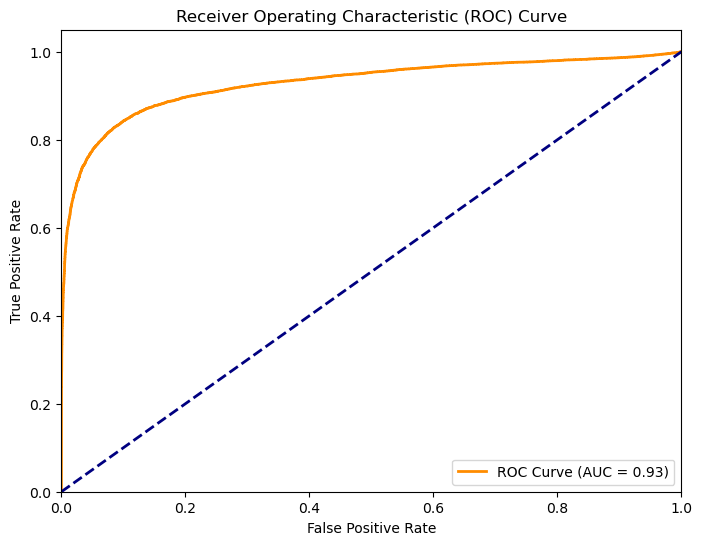

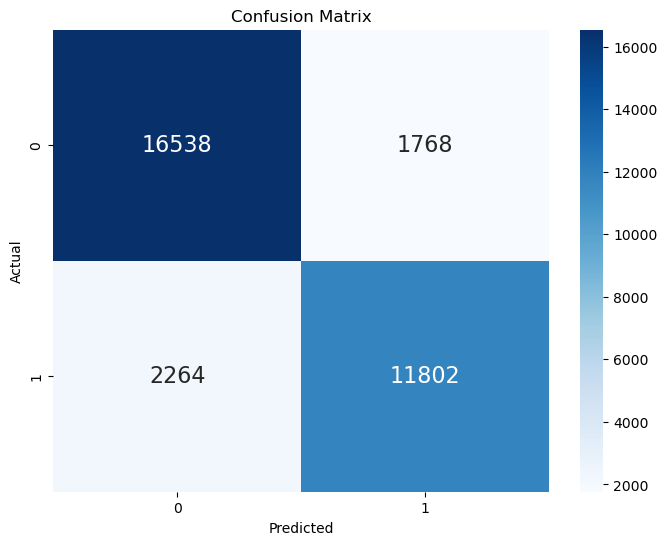

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Features evaluation

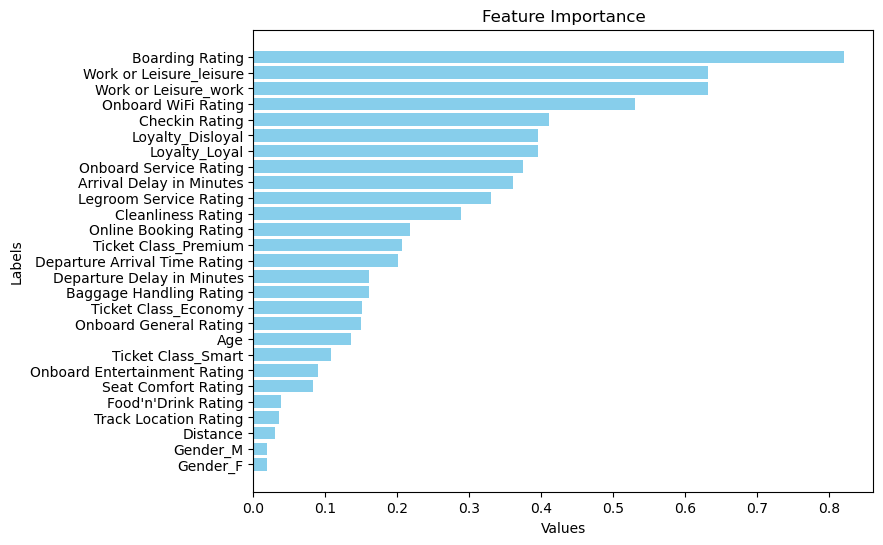

In [138]:
coefficients = np.abs(logistic_model.coef_[0])
feature_names = X.columns
coef_importance = list(zip(feature_names, coefficients))
coef_importance.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*coef_importance)
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Labels')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top feature at the top
plt.show()


## **HYPERPARAMETER TUNING**

#### Hyperparameter tuning of Logistic Regression

- ‘lbfgs’: This solver performs relatively well compared to other methods and saves a lot of memory. However, it may sometimes have issues with convergence.
- ‘newton-cg’: This solver is computationally expensive due to the Hessian Matrix.
- ‘liblinear’: This solver is recommended for high-dimensional datasets, as it is effective in solving large-scale classification problems.

In [139]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

### **NUOVO CON CHAT*

In [141]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Solvers that support l1 penalty
}

# Create a logistic regression model instance
logreg = LogisticRegression()

# RandomizedSearchCV instance
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

Best parameters found by RandomizedSearchCV:
{'solver': 'saga', 'penalty': 'l1', 'C': 0.004832930238571752}


In [142]:
# Define a more refined grid based on the results from RandomizedSearchCV
param_grid = {
    'C': [random_search.best_params_['C'] * 0.5, 
          random_search.best_params_['C'], 
          random_search.best_params_['C'] * 1.5],
    'penalty': [random_search.best_params_['penalty']],
    'solver': [random_search.best_params_['solver']]
}

# GridSearchCV instance
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'C': 0.007249395357857628, 'penalty': 'l1', 'solver': 'saga'}


In [143]:
# Evaluate the best model found by GridSearchCV
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18306
           1       0.87      0.84      0.85     14066

    accuracy                           0.88     32372
   macro avg       0.87      0.87      0.87     32372
weighted avg       0.88      0.88      0.87     32372

Accuracy: 0.8752625725935994


In [144]:
# uso il codice di mattia 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_test and y_test are your test data and labels
y_pred = best_model.predict(X_test)

print_score(best_model, X_train, y_train, X_test, y_test, train=True)
print_score(best_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.877169      0.869857  0.874118      0.873513      0.873992
recall         0.903986      0.835245  0.874118      0.869615      0.874118
f1-score       0.890375      0.852200  0.874118      0.871288      0.873788
support    54919.000000  42196.000000  0.874118  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[49646  5273]
 [ 6952 35244]]

Test Result:
Accuracy Score: 87.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.879670      0.869165  0.875263      0.874418      0.875106
recall         0.902928      0.839258  0.875263      0.871093      0.875263
f1-score       0.891147      0.853950  0.875263      0.872548      0.874984
s

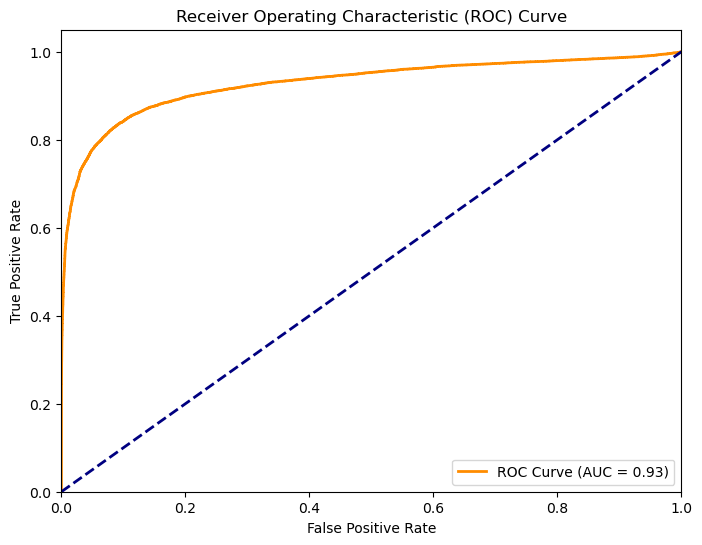

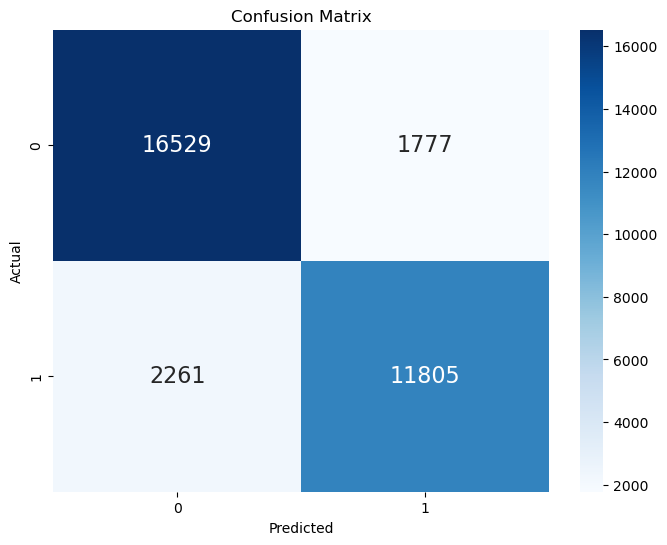

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## *CONTINUO ROBA VECCHIA*

#### Cross validation of Logistic Regression with C parameter, solver and penalty

In [146]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming X_train and y_train are your training data and labels

# Initialize Logistic Regression Model
logistic_model = LogisticRegression()

# Cross-validation (using Stratified K-Fold for example)
cv = StratifiedKFold(n_splits=5)  # 5 is a common choice
cross_val_scores = cross_val_score(logistic_model, X_train, y_train, cv=cv)

print("Cross-validation scores:", cross_val_scores)
print("Mean CV Accuracy:", np.mean(cross_val_scores))

# Hyperparameter Tuning using Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # example values
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  
}

grid_search = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Use the best parameters to retrain or evaluate your model
best_model = grid_search.best_estimator_


Cross-validation scores: [0.87082325 0.87509654 0.87422128 0.87468465 0.87406683]
Mean CV Accuracy: 0.873778510013901
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 0.8738094012253514


#### Best model


In [147]:
best_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
best_model.fit(X_train, y_train)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [148]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_test and y_test are your test data and labels
y_pred = best_model.predict(X_test)

print_score(best_model, X_train, y_train, X_test, y_test, train=True)
print_score(best_model, X_train, y_train, X_test, y_test, train=False)



Train Result:
Accuracy Score: 87.39%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.877228      0.869239  0.873892      0.873234      0.873757
recall         0.903440      0.835435  0.873892      0.869437      0.873892
f1-score       0.890141      0.852002  0.873892      0.871071      0.873570
support    54919.000000  42196.000000  0.873892  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[49616  5303]
 [ 6944 35252]]

Test Result:
Accuracy Score: 87.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.879621      0.869594  0.875417      0.874608      0.875264
recall         0.903310      0.839116  0.875417      0.871213      0.875417
f1-score       0.891308      0.854083  0.875417      0.872696      0.875134
s

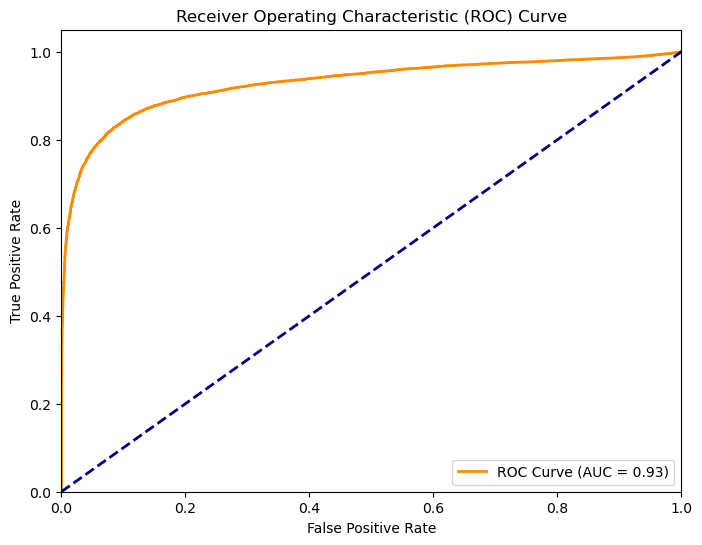

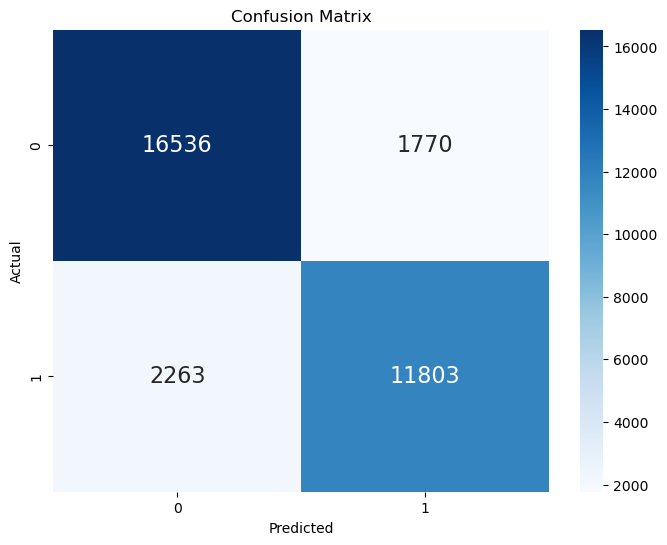

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Alternativa da far vedere**

In [150]:
# Create a LogisticRegression instance and fit it to the scaled training data
logreg = LogisticRegression() # (default penalty = "l2") / (default solver = "lbfgs")
logreg.fit(X_train, y_train)

# Predict using the scaled test data
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))




Accuracy of logistic regression classifier on train set: 0.87
Accuracy of logistic regression classifier on test set: 0.88
Precision of logistic regression classifier on test set: 0.87


In [151]:
# default solver = 'lbfgs'
logreg = LogisticRegression(penalty='none')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))


c:\Users\UTENTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy of logistic regression classifier on train set: 0.87
Accuracy of logistic regression classifier on test set: 0.88
Precision of logistic regression classifier on test set: 0.87


In [152]:
# penalty = “None”
clf = [
    LogisticRegression(solver='newton-cg',penalty='none'),
    LogisticRegression(solver='sag',penalty='none'),
    LogisticRegression(solver='saga',penalty='none')
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

c:\Users\UTENTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\UTENTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\UTENTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,Train Accuracy,Test Accuracy,Precision,Recall,AUC
0,0.87387,0.87545,0.86971,0.83904,0.87123
1,0.87386,0.87545,0.86971,0.83904,0.87123
2,0.87385,0.87545,0.86971,0.83904,0.87123


In [153]:
# penalty = 'l2'
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2'),
    LogisticRegression(solver='sag',penalty='l2'),
    LogisticRegression(solver='saga',penalty='l2'),
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precision '] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precision,Recall,AUC
0,0.87385,0.87545,0.86971,0.83904,0.87123
1,0.87385,0.87545,0.86971,0.83904,0.87123
2,0.87385,0.87545,0.86971,0.83904,0.87123


In [154]:
# solver = “liblinear” with penalty = “l1”
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

Accuracy of logistic regression classifier on train set: 0.87
Accuracy of logistic regression classifier on test set: 0.88
Precision of logistic regression classifier on test set: 0.87


In [155]:
# solver = “liblinear” with penalty = “l2”
logreg = LogisticRegression(solver='liblinear', penalty='l2')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))


Accuracy of logistic regression classifier on train set: 0.87
Accuracy of logistic regression classifier on test set: 0.88
Precision of logistic regression classifier on test set: 0.87


In [156]:
# Comparing “C” parameter
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2', C=1),
    LogisticRegression(solver='lbfgs',penalty='l2',C=2.5),
    LogisticRegression(solver='sag',penalty='l2',C=5),
    LogisticRegression(solver='saga',penalty='l2',C=10)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,0.87385,0.87545,0.86971,0.83904,0.87123
1,0.87385,0.87545,0.86971,0.83904,0.87123
2,0.87386,0.87545,0.86971,0.83904,0.87123
3,0.87385,0.87545,0.86971,0.83904,0.87123


#### Lasso

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a Lasso regression model
lasso = Lasso()

# Define the alpha values to search
param_grid = {'alpha': np.logspace(3,4, num = 100)}

# Create a GridSearchCV object to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# The best model is available as grid_search.best_estimator_
best_model = grid_search.best_estimator_

Best Alpha: 1000.0


In [158]:
results_df = pd.DataFrame.from_dict(grid_search.cv_results_)
results_df.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041874,0.002081,0.002399,0.000487,1000.0,{'alpha': 1000.0},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1
72,0.042762,0.002326,0.001799,0.000749,5336.699231,{'alpha': 5336.699231206313},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1
71,0.037995,0.002315,0.001599,0.000491,5214.008288,{'alpha': 5214.008287999684},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1
70,0.041805,0.002296,0.001599,0.000490,5094.138015,{'alpha': 5094.138014816381},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1
69,0.037909,0.001495,0.001598,0.000490,4977.023564,{'alpha': 4977.023564332114},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.040726,0.003765,0.002200,0.000400,1917.910262,{'alpha': 1917.9102616724888},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1
27,0.038709,0.004014,0.001899,0.000198,1873.817423,{'alpha': 1873.817422860385},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1
26,0.037405,0.002218,0.001799,0.000399,1830.73828,{'alpha': 1830.7382802953678},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1
36,0.038304,0.001077,0.001800,0.000400,2310.1297,{'alpha': 2310.1297000831605},-0.000001,-1.078789e-08,-0.000076,-0.00001,-0.000018,-0.000021,0.000028,1


In [159]:
best_model = grid_search.best_estimator_

print("Score:", best_model.score(X_test, y_test))
print("Coefficients")
print(best_model.coef_)


Score: -1.0575529341139145e-09
Coefficients
[ 0.  0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.
 -0.  0. -0. -0.  0. -0.  0. -0.  0.]


## **KNN**

In [160]:
from sklearn.neighbors import KNeighborsClassifier

# Create a logistic regression model
knn_classifier = KNeighborsClassifier()

# Train the model on the standardized data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

## *CON CHAT*

In [162]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create a KNN model instance
knn = KNeighborsClassifier()

# RandomizedSearchCV instance
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

c:\Users\UTENTE\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found by RandomizedSearchCV:
{'weights': 'distance', 'n_neighbors': 10, 'metric': 'euclidean'}


In [163]:
# Define a more refined grid based on the results from RandomizedSearchCV
param_grid = {
    'n_neighbors': [random_search.best_params_['n_neighbors'] - 1, 
                    random_search.best_params_['n_neighbors'], 
                    random_search.best_params_['n_neighbors'] + 1],
    'weights': [random_search.best_params_['weights']],
    'metric': [random_search.best_params_['metric']]
}

# GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


c:\Users\UTENTE\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


In [165]:
# Evaluate the best model found by GridSearchCV
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

AttributeError: 'NoneType' object has no attribute 'split'

## *CONTINUO ROBA VECCHIA*

In [161]:
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

AttributeError: 'NoneType' object has no attribute 'split'

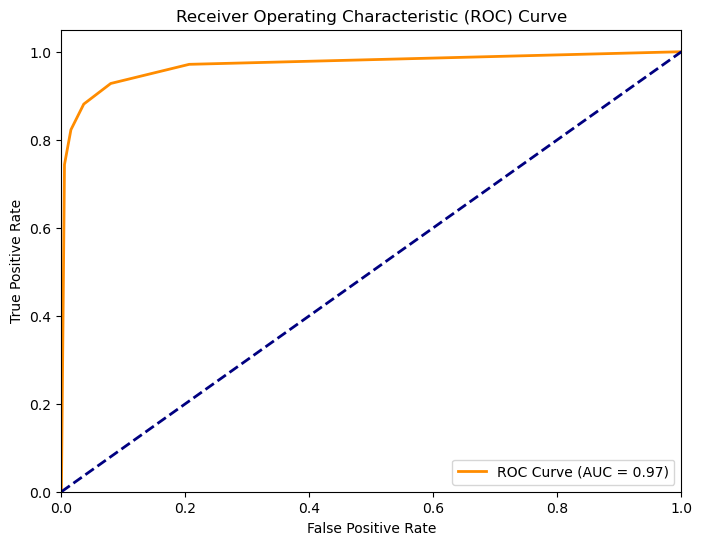

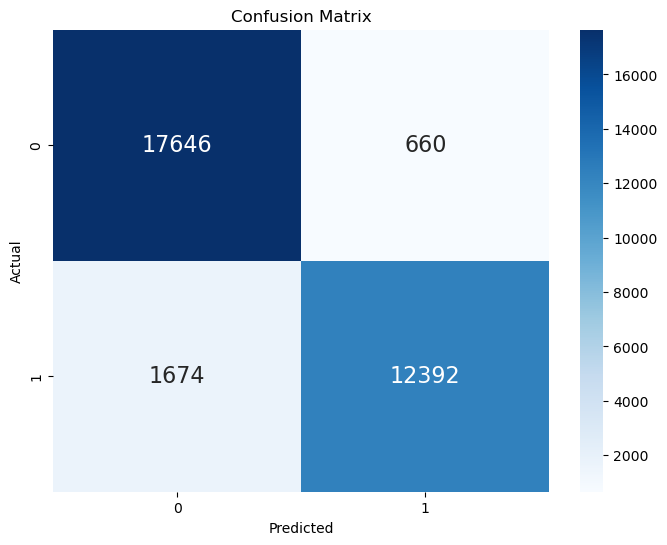

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Hyperparamter tuning of KNN

In [ ]:
# # hyperparameter tuning of knn and creation of best model
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
# from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import RandomizedSearchCV

# import numpy as np

# # Assuming X_train and y_train are your training data and labels

# # Initialize Logistic Regression Model
# knn_classifier = KNeighborsClassifier()

# # Cross-validation (using Stratified K-Fold for example)
# cv = StratifiedKFold(n_splits=5)  # 5 is a common choice
# cross_val_scores = cross_val_score(knn_classifier, X_train, y_train, cv=cv)

# print("Cross-validation scores:", cross_val_scores)
# print("Mean CV Accuracy:", np.mean(cross_val_scores))

# # Hyperparameter Tuning using Grid Search
# param_dist = {
#     'n_neighbors': range(3, 16),
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }

# random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_jobs= -1, n_iter=10, cv=cv, scoring='accuracy')
# random_search.fit(X_train, y_train)


# print("Best Parameters:", random_search.best_params_)
# print("Best CV Score:", random_search.best_score_)

# # Use the best parameters to retrain or evaluate your model
# best_model = grid_search.best_estimator_

In [ ]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier


# clf = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': [8,9,10,11,12,13,14], 'weights': ['uniform', 'distance']}, scoring='roc_auc', cv = 5)
# clf.fit(X_train, y_train)

In [ ]:
# import pandas as pd
# results = clf.cv_results_

# results_df = pd.DataFrame(results).sort_values(by = 'rank_test_score')

# results_df.head()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    54919.0  42196.0       1.0    97115.0       97115.0
_______________________________________________
Confusion Matrix: 
 [[54919     0]
 [    0 42196]]

Test Result:
Accuracy Score: 94.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.954272      0.937571  0.946991      0.945921      0.947015
recall         0.951874      0.940637  0.946991      0.946255      0.946991
f1-score       0.953071      0.939101  0.946991      0.946086      0.947001
support    18306.000000  14066.000000  0.946991  32372.000000  32

#### Hyperparameter tuning of Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": randint(1, 20),  # Use a distribution for max_depth
    "min_samples_split": randint(2, 5),  # Use a distribution for min_samples_split
    "min_samples_leaf": randint(1, 20),  # Use a distribution for min_samples_leaf
}

# Number of iterations for RandomizedSearchCV to sample
n_iter_search = 150  # You can adjust this depending on how long you're willing to wait

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = RandomizedSearchCV(
    tree_clf,
    param_distributions=params,
    n_iter=n_iter_search,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5,
    random_state=42
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=13)

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.52%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.960310      0.971870  0.965206      0.966090      0.965333
recall         0.978933      0.947341  0.965206      0.963137      0.965206
f1-score       0.969532      0.959449  0.965206      0.964490      0.965151
support    54919.000000  42196.000000  0.965206  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[53762  1157]
 [ 2222 39974]]

Test Result:
Accuracy Score: 95.34%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.950198      0.957647  0.953355      0.953923      0.953435
recall         0.968262      0.933954  0.953355      0.951108      0.953355
f1-score       0.959145      0.945652  0.953355      0.952399      0.953282
s

### **SVM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier
gbc = GradientBoostingClassifier()

# Fit the model
gbc.fit(X_train, y_train)

# Predict the labels
y_pred = gbc.predict(X_test)


In [ ]:
# print the evaluation scores for the model
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 94.24%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.940035      0.945673  0.942419      0.942854      0.942484
recall         0.959377      0.920348  0.942419      0.939862      0.942419
f1-score       0.949607      0.932839  0.942419      0.941223      0.942321
support    54919.000000  42196.000000  0.942419  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[52688  2231]
 [ 3361 38835]]

Test Result:
Accuracy Score: 94.29%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.940000      0.946752  0.942852      0.943376      0.942934
recall         0.960232      0.920233  0.942852      0.940232      0.942852
f1-score       0.950008      0.933304  0.942852      0.941656      0.942750
s

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200],  # Reduced number of options
    'learning_rate': [0.01, 0.1],  # Simplified to two options
    'max_depth': [3, 5]  # Limited to two depths
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/marco.sebastiani/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=  18.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=  19.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=  19.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=  30.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=  30.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  38.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  38.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=  39.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=  31.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=  21.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=  20.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=  21.3s
[CV] END ...learning_rate=0.

In [ ]:
best_gb = GradientBoostingClassifier(**random_search.best_params_)
best_gb.fit(X_train, y_train)
y_pred = best_gb.predict(X_test)

print_score(best_gb, X_train, y_train, X_test, y_test, train=True)
print_score(best_gb, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.960250      0.97616  0.966957      0.968205      0.967163
recall         0.982228      0.94708  0.966957      0.964654      0.966957
f1-score       0.971115      0.96140  0.966957      0.966257      0.966894
support    54919.000000  42196.00000  0.966957  97115.000000  97115.000000
_______________________________________________
Confusion Matrix: 
 [[53943   976]
 [ 2233 39963]]

Test Result:
Accuracy Score: 96.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.955958      0.972314  0.962838      0.964136      0.963065
recall         0.979406      0.941277  0.962838      0.960341      0.962838
f1-score       0.967540      0.956544  0.962838      0.962042      0.962762
suppor

## Ridge
.. if you need to tame the weights.

Objective function:

$\hat{y}(x,w) = ||X w - y||^2_2 + \alpha ||w||^2_2$

$\alpha$ is a hyperparameter and its role is to tune the regularization $||w||^2_2$ which controls the coefficients of the regression.

In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.5)

reg.fit(X_train, y_train)

print("Score:", reg.score(X_test, y_test))
print("Coefficients")
print(reg.coef_)

Score: 0.3040782039712757
Coefficients
[0.2442066  0.01769436]
